In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Open the trips.csv file
trips = pd.read_csv("C:/Users/kemal/Desktop/bss real/Data2019/trips2019.csv", index_col=0)

C:\Users\kemal\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
trips.head()

In [9]:
trips.columns

Index(['duration', 'start_date', 'end_date', 'start_station_number',
       'start_station', 'end_station_number', 'end_station', 'member_type'],
      dtype='object')

In [5]:
#Check the types of the trips file
trips.dtypes

duration                 int64
start_date              object
end_date                object
start_station_number     int64
start_station           object
end_station_number       int64
end_station             object
member_type             object
dtype: object

In [6]:
# Change type to datetime
trips = trips.astype({"start_date": "datetime64"})
trips = trips.astype({"end_date": "datetime64"})

In [7]:
# Check the types of the trips file
trips.dtypes

duration                         int64
start_date              datetime64[ns]
end_date                datetime64[ns]
start_station_number             int64
start_station                   object
end_station_number               int64
end_station                     object
member_type                     object
dtype: object

In [10]:
# Create new columns with the day of the week and the hour of the day using start_date.
trips["start_day"] = trips["start_date"].dt.weekday_name

In [11]:
trips["start_hour"] = trips["start_date"].dt.hour

In [12]:
# Check the head of trips
trips.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,member_type,start_day,start_hour
0,230,2019-01-01 00:04:00,2019-01-01 00:08:00,31203,14th & Rhode Island Ave NW,31200,Massachusetts Ave & Dupont Circle NW,Member,Tuesday,0
1,1549,2019-01-01 00:06:00,2019-01-01 00:32:00,31321,15th St & Constitution Ave NW,31114,18th St & Wyoming Ave NW,Casual,Tuesday,0
2,177,2019-01-01 00:08:00,2019-01-01 00:11:00,31104,Adams Mill & Columbia Rd NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,Casual,Tuesday,0
3,228,2019-01-01 00:08:00,2019-01-01 00:12:00,31281,8th & O St NW,31280,11th & S St NW,Member,Tuesday,0
4,1300,2019-01-01 00:12:00,2019-01-01 00:34:00,31014,Lynn & 19th St North,31923,Columbia Pike & S Taylor St,Member,Tuesday,0


In [13]:
# Group by start_hour and start_day and count the number of trips
trips_day_count = trips.groupby(["start_hour","start_day"]).count()

In [14]:
# Check trips_day head
trips_day_count.head()

duration  start_date  end_date  start_station_number  \
start_hour start_day                                                         
0          Friday         4105        4105      4105                  4105   
           Monday         2905        2905      2905                  2905   
           Saturday       6035        6035      6035                  6035   
           Sunday         6259        6259      6259                  6259   
           Thursday       2856        2856      2856                  2856   

                      start_station  end_station_number  end_station  \
start_hour start_day                                                   
0          Friday              4105                4105         4105   
           Monday              2905                2905         2905   
           Saturday            6035                6035         6035   
           Sunday              6259                6259         6259   
           Thursday            2856                2856         2856   

                      member_type  
start_hour start_day               
0          Friday            4105  
           Monday            2905  
           Saturday          6035  
           Sunday            6259  
           Thursday          2856

In [15]:
# Use unstack() in order to be able to plot the total number of trips by hour as a function of the day for two years
trips_day_count = trips_day_count['duration'].unstack()

In [16]:
# Divide the total amount of trips by 108 to obtain the average of trips per week
trips_day_count = trips_day_count/108

In [56]:
# Check trip_day_count
trips_day_count

start_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
start_hour,,,,,,,
0,38.009259,26.898148,55.879630,57.953704,26.444444,26.481481,27.824074
1,20.666667,13.620370,32.120370,37.074074,11.370370,14.092593,11.324074
2,11.601852,7.990741,21.750000,25.796296,6.592593,9.814815,6.435185
3,6.324074,4.722222,10.833333,13.351852,3.361111,4.870370,3.527778
4,7.842593,7.157407,7.342593,8.148148,8.212963,8.064815,7.638889
5,35.055556,36.277778,21.648148,18.685185,40.759259,41.083333,43.361111
6,105.333333,113.962963,62.333333,51.814815,131.212963,128.870370,131.712963
7,251.361111,267.064815,146.851852,119.314815,309.527778,300.935185,309.388889
8,446.583333,430.916667,259.175926,218.953704,511.231481,486.666667,498.814815


Text(0, 0.5, 'Trips number')

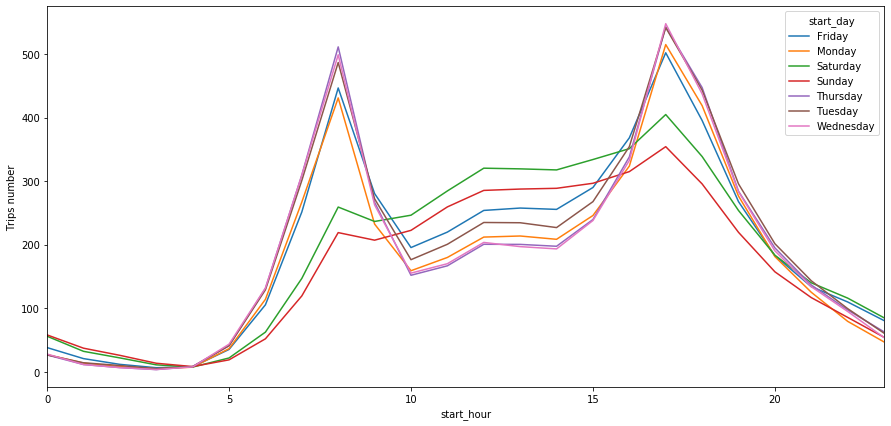

In [18]:
# plot the data to see the number of trips per hour as a function of the days
fig, ax = plt.subplots(figsize=(15,7))
trips_day_count.plot(ax=ax)
plt.ylabel('Trips number')

In [19]:
# Add a column named start_weekday to the trips dataframe that says if the start_day is a weekday or a weekend.
weekday_lst = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
trips['start_weekday'] = ['weekday' if x in weekday_lst else 'weekend' for x in trips['start_day']]

In [20]:
# Check trips head
trips.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,member_type,start_day,start_hour,start_weekday
0,230,2019-01-01 00:04:00,2019-01-01 00:08:00,31203,14th & Rhode Island Ave NW,31200,Massachusetts Ave & Dupont Circle NW,Member,Tuesday,0,weekday
1,1549,2019-01-01 00:06:00,2019-01-01 00:32:00,31321,15th St & Constitution Ave NW,31114,18th St & Wyoming Ave NW,Casual,Tuesday,0,weekday
2,177,2019-01-01 00:08:00,2019-01-01 00:11:00,31104,Adams Mill & Columbia Rd NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,Casual,Tuesday,0,weekday
3,228,2019-01-01 00:08:00,2019-01-01 00:12:00,31281,8th & O St NW,31280,11th & S St NW,Member,Tuesday,0,weekday
4,1300,2019-01-01 00:12:00,2019-01-01 00:34:00,31014,Lynn & 19th St North,31923,Columbia Pike & S Taylor St,Member,Tuesday,0,weekday


In [21]:
# Create trips_weekday dataframe with only the weekdays by removing all weekend days
trips_weekday = trips[~trips.start_weekday.str.contains("weekend")]

In [22]:
# Check trips_weekday head
trips_weekday.head()

,duration,start_date,end_date,start_station_number,start_station,end_station_number,end_station,member_type,start_day,start_hour,start_weekday
0,230,2019-01-01 00:04:00,2019-01-01 00:08:00,31203,14th & Rhode Island Ave NW,31200,Massachusetts Ave & Dupont Circle NW,Member,Tuesday,0,weekday
1,1549,2019-01-01 00:06:00,2019-01-01 00:32:00,31321,15th St & Constitution Ave NW,31114,18th St & Wyoming Ave NW,Casual,Tuesday,0,weekday
2,177,2019-01-01 00:08:00,2019-01-01 00:11:00,31104,Adams Mill & Columbia Rd NW,31323,Woodley Park Metro / Calvert St & Connecticut ...,Casual,Tuesday,0,weekday
3,228,2019-01-01 00:08:00,2019-01-01 00:12:00,31281,8th & O St NW,31280,11th & S St NW,Member,Tuesday,0,weekday
4,1300,2019-01-01 00:12:00,2019-01-01 00:34:00,31014,Lynn & 19th St North,31923,Columbia Pike & S Taylor St,Member,Tuesday,0,weekday


In [23]:
# Group by start_hour and start_station_number and count the number of trips
trips_station = trips_weekday.groupby(["start_hour","start_station_number"]).count()

In [24]:
# Use unstack() in order to be able to plot the total number of trips by hour as a function of the day for two years
trips_station = trips_station['duration'].unstack()

In [25]:
trips_station

start_station_number,0,31000,31001,31002,31003,31004,31005,31006,31007,31008,...,32600,32601,32602,32603,32604,32605,32606,32607,32608,32609
start_hour,,,,,,,,,,,,,,,,,,,,,
0,6.0,7.0,8.0,9.0,7.0,1.0,17.0,9.0,13.0,NaN,...,NaN,3.0,NaN,1.0,2.0,1.0,1.0,NaN,NaN,NaN
1,1.0,4.0,8.0,9.0,6.0,1.0,2.0,7.0,5.0,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,NaN,NaN,9.0,NaN,1.0,11.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,3.0,NaN,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,NaN,2.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
5,1.0,6.0,19.0,6.0,5.0,12.0,14.0,7.0,21.0,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,15.0,4.0,2.0
6,NaN,11.0,8.0,61.0,121.0,97.0,5.0,120.0,158.0,3.0,...,NaN,NaN,12.0,3.0,2.0,9.0,7.0,9.0,11.0,5.0
7,3.0,38.0,32.0,229.0,95.0,199.0,102.0,61.0,711.0,3.0,...,15.0,3.0,16.0,70.0,18.0,13.0,19.0,6.0,33.0,32.0
8,3.0,61.0,107.0,489.0,207.0,201.0,272.0,160.0,1433.0,1.0,...,1.0,6.0,18.0,29.0,45.0,28.0,140.0,28.0,15.0,72.0


In [26]:
# Evaluate the number of NaN's
trips_station.isna().sum()

start_station_number
0        3
31000    2
31001    3
31002    3
31003    0
        ..
32605    3
32606    6
32607    4
32608    5
32609    5
Length: 582, dtype: int64

In [27]:
# Remove all stations that have more than two NaN's
trips_station = trips_station.dropna(thresh=len(trips_station) - 2, axis=1)

In [28]:
# Replace the NaN's by 0
trips_station = trips_station.fillna(0)

In [29]:
trips_station

start_station_number,31000,31003,31004,31005,31006,31007,31010,31011,31012,31013,...,32056,32058,32081,32083,32229,32234,32403,32406,32413,32415
start_hour,,,,,,,,,,,,,,,,,,,,,
0,7.0,7.0,1.0,17.0,9.0,13.0,12.0,11.0,9.0,20.0,...,5.0,3.0,2.0,6.0,3.0,2.0,1.0,27.0,1.0,2.0
1,4.0,6.0,1.0,2.0,7.0,5.0,7.0,8.0,1.0,10.0,...,10.0,2.0,1.0,1.0,2.0,1.0,1.0,9.0,0.0,1.0
2,0.0,9.0,0.0,1.0,11.0,3.0,6.0,7.0,3.0,4.0,...,5.0,0.0,0.0,1.0,2.0,3.0,1.0,6.0,1.0,1.0
3,0.0,3.0,0.0,1.0,1.0,1.0,4.0,0.0,1.0,0.0,...,0.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,1.0,1.0,0.0,0.0,1.0,30.0,0.0,0.0,3.0,...,19.0,1.0,1.0,0.0,0.0,2.0,0.0,6.0,1.0,0.0
5,6.0,5.0,12.0,14.0,7.0,21.0,27.0,3.0,2.0,4.0,...,39.0,2.0,0.0,0.0,5.0,6.0,2.0,14.0,1.0,1.0
6,11.0,121.0,97.0,5.0,120.0,158.0,61.0,36.0,10.0,29.0,...,22.0,93.0,15.0,14.0,4.0,29.0,9.0,9.0,3.0,6.0
7,38.0,95.0,199.0,102.0,61.0,711.0,96.0,139.0,26.0,106.0,...,52.0,122.0,42.0,33.0,56.0,37.0,15.0,15.0,8.0,2.0
8,61.0,207.0,201.0,272.0,160.0,1433.0,114.0,166.0,69.0,345.0,...,52.0,81.0,102.0,11.0,302.0,26.0,26.0,26.0,7.0,10.0


In [30]:
# Select the data for stations number 31245 and 31018
trips_station_comparison = trips_station[[31245, 31018]]

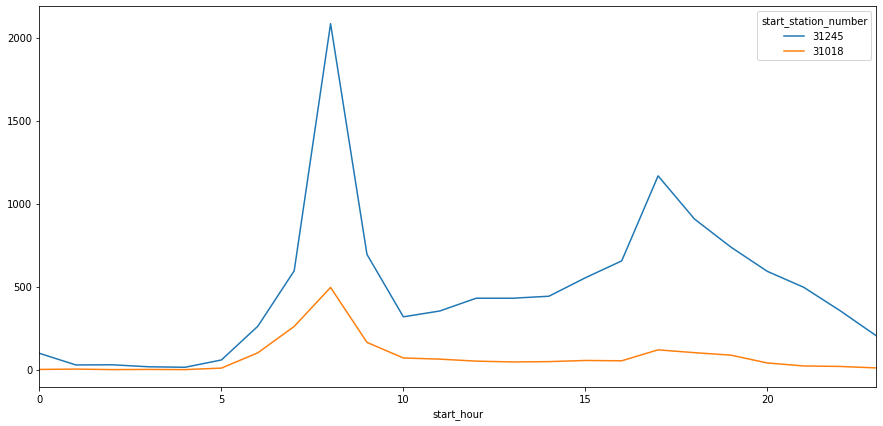

In [58]:
# Print the graphs for the two stations
fig, ax = plt.subplots(figsize=(15,7))
trips_station_comparison.plot(ax=ax)

In [32]:
# Normalize the time series for all stations using the apply method.
trips_station_normal = trips_station.apply(lambda x: (x-min(x))/(max(x)-min(x)), axis=0)

In [33]:
trips_station_normal

start_station_number,31000,31003,31004,31005,31006,31007,31010,31011,31012,31013,...,32056,32058,32081,32083,32229,32234,32403,32406,32413,32415
start_hour,,,,,,,,,,,,,,,,,,,,,
0,0.061404,0.013793,0.004975,0.020681,0.040000,0.008380,0.040,0.016641,0.015707,0.057971,...,0.094340,0.024590,0.019608,0.162162,0.009934,0.043478,0.029412,0.272727,0.05,0.050
1,0.035088,0.011494,0.004975,0.002433,0.031111,0.002793,0.015,0.012103,0.001745,0.028986,...,0.188679,0.016393,0.009804,0.027027,0.006623,0.021739,0.029412,0.090909,0.00,0.025
2,0.000000,0.018391,0.000000,0.001217,0.048889,0.001397,0.010,0.010590,0.005236,0.011594,...,0.094340,0.000000,0.000000,0.027027,0.006623,0.065217,0.029412,0.060606,0.05,0.025
3,0.000000,0.004598,0.000000,0.001217,0.004444,0.000000,0.000,0.000000,0.001745,0.000000,...,0.000000,0.032787,0.009804,0.027027,0.000000,0.000000,0.000000,0.000000,0.05,0.000
4,0.017544,0.000000,0.004975,0.000000,0.000000,0.000000,0.130,0.000000,0.000000,0.008696,...,0.358491,0.008197,0.009804,0.000000,0.000000,0.043478,0.000000,0.060606,0.05,0.000
5,0.052632,0.009195,0.059701,0.017032,0.031111,0.013966,0.115,0.004539,0.003490,0.011594,...,0.735849,0.016393,0.000000,0.000000,0.016556,0.130435,0.058824,0.141414,0.05,0.025
6,0.096491,0.275862,0.482587,0.006083,0.533333,0.109637,0.285,0.054463,0.017452,0.084058,...,0.415094,0.762295,0.147059,0.378378,0.013245,0.630435,0.264706,0.090909,0.15,0.150
7,0.333333,0.216092,0.990050,0.124088,0.271111,0.495810,0.460,0.210287,0.045375,0.307246,...,0.981132,1.000000,0.411765,0.891892,0.185430,0.804348,0.441176,0.151515,0.40,0.050
8,0.535088,0.473563,1.000000,0.330900,0.711111,1.000000,0.550,0.251135,0.120419,1.000000,...,0.981132,0.663934,1.000000,0.297297,1.000000,0.565217,0.764706,0.262626,0.35,0.250


In [34]:
# Transpose the dataframe in order to be able to apply the k-means model on each bike station.
trips_station_normal_trans = trips_station_normal.transpose()

In [35]:
# Transform the trips_station_normal_trans dataframe to an array in order to be able to use k-means method
X = trips_station_normal_trans.to_numpy()

In [36]:
# Fit the kmeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [37]:
# See the label array and assign it to a variable called label
kmeans.labels_

array([2, 2, 1, 0, 2, 1, 2, 0, 0, 1, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 0, 2,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2,
       2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2,
       0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1,

In [38]:
# Add the label array to the trips_station_normal_trans array
array_cluster = np.column_stack((trips_station_normal_trans,kmeans.labels_))

In [39]:
# Transform the array into a dataframe
trips_station_normal_trans = pd.DataFrame(array_cluster)

In [40]:
# Transpose the dataframe to have the cluster number for each station in the dataframe
trips_station_normal_cluster = trips_station_normal_trans.transpose()

In [41]:
trips_station_normal_cluster

,0,1,2,3,4,5,6,7,8,9,...,382,383,384,385,386,387,388,389,390,391
0,0.061404,0.013793,0.004975,0.020681,0.040000,0.008380,0.040,0.016641,0.015707,0.057971,...,0.094340,0.024590,0.019608,0.162162,0.009934,0.043478,0.029412,0.272727,0.05,0.050
1,0.035088,0.011494,0.004975,0.002433,0.031111,0.002793,0.015,0.012103,0.001745,0.028986,...,0.188679,0.016393,0.009804,0.027027,0.006623,0.021739,0.029412,0.090909,0.00,0.025
2,0.000000,0.018391,0.000000,0.001217,0.048889,0.001397,0.010,0.010590,0.005236,0.011594,...,0.094340,0.000000,0.000000,0.027027,0.006623,0.065217,0.029412,0.060606,0.05,0.025
3,0.000000,0.004598,0.000000,0.001217,0.004444,0.000000,0.000,0.000000,0.001745,0.000000,...,0.000000,0.032787,0.009804,0.027027,0.000000,0.000000,0.000000,0.000000,0.05,0.000
4,0.017544,0.000000,0.004975,0.000000,0.000000,0.000000,0.130,0.000000,0.000000,0.008696,...,0.358491,0.008197,0.009804,0.000000,0.000000,0.043478,0.000000,0.060606,0.05,0.000
5,0.052632,0.009195,0.059701,0.017032,0.031111,0.013966,0.115,0.004539,0.003490,0.011594,...,0.735849,0.016393,0.000000,0.000000,0.016556,0.130435,0.058824,0.141414,0.05,0.025
6,0.096491,0.275862,0.482587,0.006083,0.533333,0.109637,0.285,0.054463,0.017452,0.084058,...,0.415094,0.762295,0.147059,0.378378,0.013245,0.630435,0.264706,0.090909,0.15,0.150
7,0.333333,0.216092,0.990050,0.124088,0.271111,0.495810,0.460,0.210287,0.045375,0.307246,...,0.981132,1.000000,0.411765,0.891892,0.185430,0.804348,0.441176,0.151515,0.40,0.050
8,0.535088,0.473563,1.000000,0.330900,0.711111,1.000000,0.550,0.251135,0.120419,1.000000,...,0.981132,0.663934,1.000000,0.297297,1.000000,0.565217,0.764706,0.262626,0.35,0.250
9,1.000000,0.427586,0.781095,0.189781,0.551111,0.400140,0.440,0.219365,0.085515,0.626087,...,0.528302,0.221311,0.274510,0.459459,0.122517,0.304348,0.411765,0.242424,0.30,0.250


In [42]:
# Select the stations that are part of cluster 0 (i.e. that have index 24 = 0)
trips_station_normal_cluster0 = trips_station_normal_cluster[trips_station_normal_cluster.columns[trips_station_normal_cluster.iloc[-1]==0.000000]]

In [43]:
# Check if it worked
trips_station_normal_cluster0

,3,7,8,10,13,20,22,24,32,34,...,349,360,361,366,367,368,374,376,377,378
0,0.020681,0.016641,0.015707,0.015912,0.041481,0.0256,0.083799,0.015576,0.039216,0.009036,...,0.074074,0.052,0.009363,0.100592,0.062893,0.047146,0.045802,0.009804,0.029412,0.034091
1,0.002433,0.012103,0.001745,0.007344,0.026667,0.0064,0.050279,0.018692,0.006303,0.015060,...,0.074074,0.036,0.001873,0.035503,0.031447,0.007444,0.015267,0.000000,0.029412,0.028409
2,0.001217,0.010590,0.005236,0.004896,0.007407,0.0096,0.013966,0.000000,0.004202,0.012048,...,0.000000,0.008,0.001873,0.005917,0.000000,0.000000,0.015267,0.009804,0.029412,0.034091
3,0.001217,0.000000,0.001745,0.004896,0.001481,0.0000,0.000000,0.006231,0.000000,0.000000,...,0.000000,0.004,0.001873,0.000000,0.000000,0.004963,0.007634,0.009804,0.007353,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0048,0.058659,0.000000,0.002101,0.039157,...,0.037037,0.000,0.000000,0.000000,0.006289,0.027295,0.000000,0.127451,0.000000,0.000000
5,0.017032,0.004539,0.003490,0.032436,0.002963,0.0736,0.016760,0.006231,0.004202,0.006024,...,0.037037,0.172,0.001873,0.071006,0.031447,0.039702,0.000000,0.303922,0.014706,0.085227
6,0.006083,0.054463,0.017452,0.040392,0.028148,0.1392,0.251397,0.031153,0.025210,0.045181,...,0.111111,0.076,0.028090,0.100592,0.031447,0.044665,0.076336,0.058824,0.095588,0.062500
7,0.124088,0.210287,0.045375,0.167687,0.066667,0.4896,0.254190,0.096573,0.238095,0.087349,...,0.333333,0.184,0.067416,0.088757,0.163522,0.089330,0.106870,0.176471,0.279412,0.221591
8,0.330900,0.251135,0.120419,0.376377,0.157037,0.5216,0.444134,0.286604,0.399860,0.243976,...,0.407407,0.452,0.080524,0.153846,0.295597,0.126551,0.129771,0.549020,0.205882,0.295455
9,0.189781,0.219365,0.085515,0.335985,0.451852,0.3824,0.198324,0.330218,0.146359,0.129518,...,0.037037,0.300,0.091760,0.130178,0.144654,0.109181,0.114504,0.196078,0.323529,0.204545


In [44]:
# Remove the last row of the previous dataframe
trips_station_normal_cluster0 = trips_station_normal_cluster0.drop([24])

In [45]:
# Add a column that gives the average of all previous columns
trips_station_normal_cluster0['average'] = trips_station_normal_cluster0.mean(numeric_only=True, axis=1)

In [46]:
trips_station_normal_cluster0.head()

,3,7,8,10,13,20,22,24,32,34,...,360,361,366,367,368,374,376,377,378,average
0,0.020681,0.016641,0.015707,0.015912,0.041481,0.0256,0.083799,0.015576,0.039216,0.009036,...,0.052,0.009363,0.100592,0.062893,0.047146,0.045802,0.009804,0.029412,0.034091,0.031729
1,0.002433,0.012103,0.001745,0.007344,0.026667,0.0064,0.050279,0.018692,0.006303,0.015060,...,0.036,0.001873,0.035503,0.031447,0.007444,0.015267,0.000000,0.029412,0.028409,0.015097
2,0.001217,0.010590,0.005236,0.004896,0.007407,0.0096,0.013966,0.000000,0.004202,0.012048,...,0.008,0.001873,0.005917,0.000000,0.000000,0.015267,0.009804,0.029412,0.034091,0.007638
3,0.001217,0.000000,0.001745,0.004896,0.001481,0.0000,0.000000,0.006231,0.000000,0.000000,...,0.004,0.001873,0.000000,0.000000,0.004963,0.007634,0.009804,0.007353,0.000000,0.002139
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0048,0.058659,0.000000,0.002101,0.039157,...,0.000,0.000000,0.000000,0.006289,0.027295,0.000000,0.127451,0.000000,0.000000,0.005818


Text(0.5, 0, 'Hour')

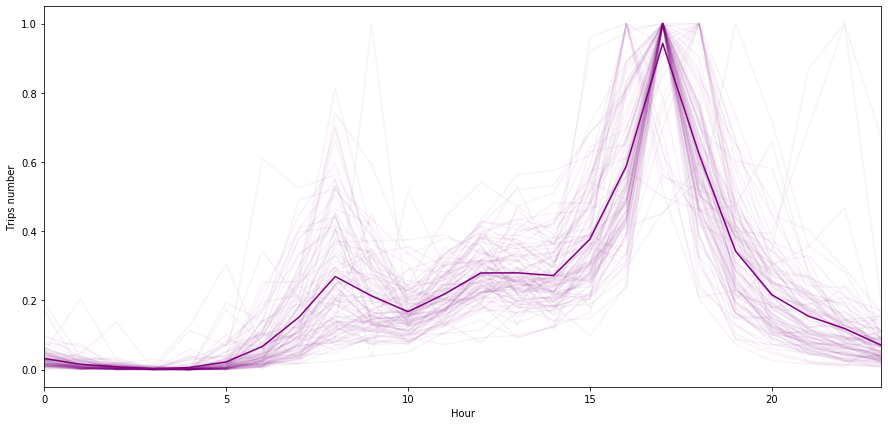

In [47]:
# Plot all the normalised curves for cluster 0 and the average
fig, ax = plt.subplots(figsize=(15,7))
trips_station_normal_cluster0.plot(ax=ax,color='purple', alpha=0.05)
trips_station_normal_cluster0["average"].plot(ax=ax,color='purple', alpha=1)
ax.get_legend().remove()
plt.ylabel('Trips number')
plt.xlabel('Hour')

In [48]:
# Select the stations that are part of cluster 1 (i.e. that have index 24 = 1)
trips_station_normal_cluster1 = trips_station_normal_cluster[trips_station_normal_cluster.columns[trips_station_normal_cluster.iloc[-1]==1.000000]]

In [49]:
# Remove the last row of the previous dataframe
trips_station_normal_cluster1 = trips_station_normal_cluster1.drop([24])

In [50]:
# Add a column that gives the average of all previous columns
trips_station_normal_cluster1['average'] = trips_station_normal_cluster1.mean(numeric_only=True, axis=1)

Text(0.5, 0, 'Hour')

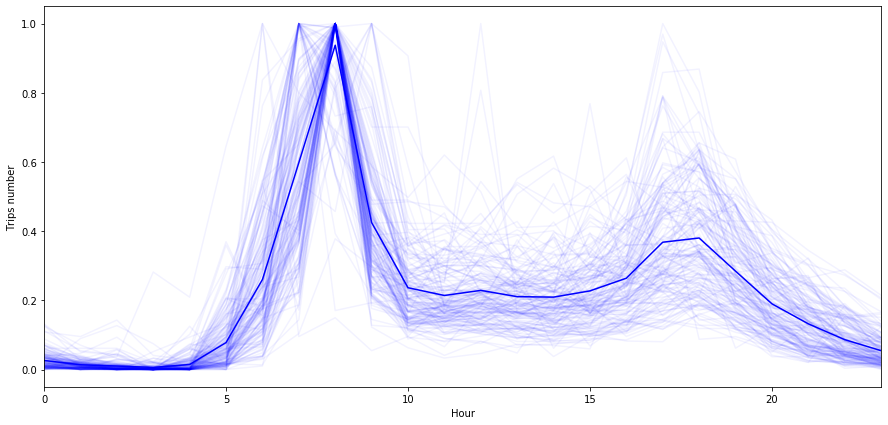

In [51]:
# Plot all the normalised curves for cluster 0 and the average
fig, ax = plt.subplots(figsize=(15,7))
trips_station_normal_cluster1.plot(ax=ax,color='blue', alpha=0.05)
trips_station_normal_cluster1["average"].plot(ax=ax,color='blue', alpha=1)
ax.get_legend().remove()
plt.ylabel('Trips number')
plt.xlabel('Hour')

In [52]:
# Select the stations that are part of cluster 2 (i.e. that have index 24 = 2)
trips_station_normal_cluster2 = trips_station_normal_cluster[trips_station_normal_cluster.columns[trips_station_normal_cluster.iloc[-1]==2.000000]]

In [53]:
# Remove the last row of the previous dataframe
trips_station_normal_cluster2 = trips_station_normal_cluster2.drop([24])

In [54]:
# Add a column that gives the average of all previous columns
trips_station_normal_cluster2['average'] = trips_station_normal_cluster2.mean(numeric_only=True, axis=1)

Text(0.5, 0, 'Hour')

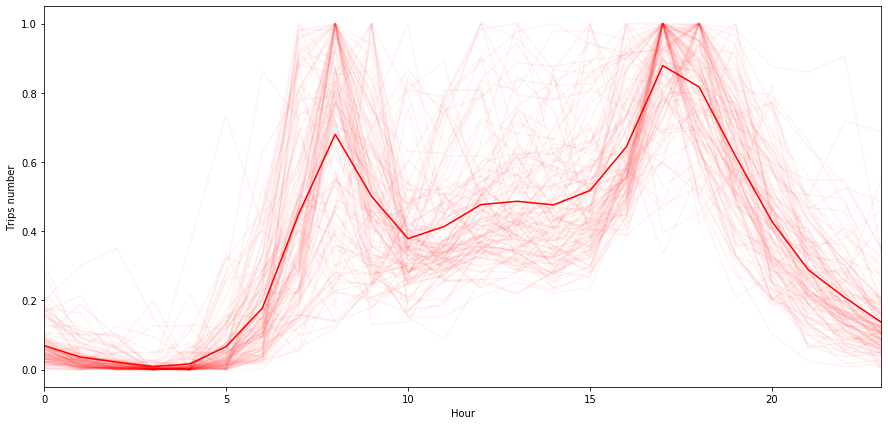

In [55]:
# Plot all the normalised curves for cluster 0 and the average
fig, ax = plt.subplots(figsize=(15,7))
trips_station_normal_cluster2.plot(ax=ax,color='red', alpha=0.05)
trips_station_normal_cluster2["average"].plot(ax=ax,color='red', alpha=1)
ax.get_legend().remove()
plt.ylabel('Trips number')
plt.xlabel('Hour')